### DSCI100 Group 006-35 W2 Final Project

Younghoon Kim 11371317 <br>
Kentaro Barnes 49524861 <br>
Sean Liou 86967916 <br>
Matthew Pabustan 48718266 <br>

## How does player experience level and age influence the total number of hours played?

## Introduction

Videogames are a valuable source of data for studying human behavior and online interaction. At the University of British Columbia, a research group led by Professor Frank Wood has created a Minecraft-based research server designed to collect such data. Here, players' actions are continuously logged as they explore the game. That said, managing the server presents serveral logististical challenges. Namely, the research team must ensure that they have enough hardware and software resources to handle peak player loads, and must also prioritize recruitment of participants who are likely to contribute meaningful amounts of data.

In this project, we investigate the relationship between player experience level, age, and the total number of hours played. Specifically, we aim to answer the question:
**How does player experience level and age influence the total number of hours played?** We believe that understanding this relationship can help the research team better predict which players are likely to engage deeply with the server over time, enabling them to recruit more effectively and plan resources accordingly.

To explore this question, we use the players.csv dataset which contains information about information about a variety of player demographics as well as each player's experience level, engagement with the server, and subscription status. We have also included the sessions.csv dataset, which contains informataion about individual players' sessions on the server, to support further analysis.

## Datasets
### players.csv overview
A list of 196 unique participants who played on the minecraft server hosted for a scientific study with the following information for each player:
##### experience
- Originally a character `<chr>` variable, converted to factor `<fct>` containing one of the following:
    - Beginner (35)
    - Regular (36)
    - Amateur (63)  
    - Veteran (48)
    - Pro (14)
- Represents a player's self-reported experience in the game.
##### subscribe
- a logical `<lgl>` variable where TRUE indicates that the player is subscribed to the game-related newsletter, and FALSE indicates that the player has not
    - 144 players reported TRUE, 52 reported FALSE.
##### hashedEmail
- a string of characters `<chr>` that acts as a unique id to identify players in sessions.csv
##### played_hours
- A double `<dbl>` variable, indicating the number of hours a participant has spent playing on the server.
    - On average, each player spends a total of 5.85 hours.
##### name
- A character `<chr`> variable containing the player's real (first) name.
##### gender
- Originally a character `<chr>` variable, converted to factor `<fct>` containing one of the following:
    - Male (124)
    - Female (37)
    - Non-binary (15)
    - Prefer not to say (11)
    - Agender (2)
    - Two-Spirited (6)
    - Other (1)
- Represents a player's gender
##### Age
- A double `<dbl>` variable, indicating the age of the player in years.
    - On average, the players are 20.52 years old.
    - Two rows/players contain missing Age data, and thus is removed from the list.

### sessions.csv overview
A catalogue of all 1535 instances where a player logs into the server with the following information for each instance.
##### hashedEmail
- a string of characters `<chr>` indicating which unique player that logged on, allowing us to track session information along with personal information in players.csv.
##### start_time
- Originally a string of characters `<chr>` indicating the time (Day/Month/Year Hour:Minute) when the player logs ON
    - Converted to a date-time `<ddtm>` variable for ease of use.
##### end_time
- Originally a string of characters `<chr>` indicating the time (Day/Month/Year Hour:Minute) when the player logs OFF
    - Converted to a date-time `<ddtm>` variable for ease of use.
##### original_start_time
- A double `<dbl>` variable that represents the time a player logs ON, in number of milliseconds since 1970.
    - Not reported to high enough precision for comparison, and thus is removed.
##### original_end_time
- A double `<dbl>` variable that represents the time a player logs OFF, in number of milliseconds since 1970.
    - Not reported to high enough precision for comparison, and thus is removed.



## Methods

#### Data Acquisition and Data Collection
- Load necessary R libraries
- Load the *players.csv* and *sessions.csv* stored on our GitHub

In [73]:
# Load necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

set.seed(69420)

In [87]:
# Reading the data

# URL to the csv files stored on github
players_url <- "https://raw.githubusercontent.com/Seanrsl19/dsci-100-s006-g35/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Seanrsl19/dsci-100-s006-g35/refs/heads/main/sessions.csv"

# read the csv data into dataframes
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Data Cleaning and Wrangling
- Tidy the data to contain only the information we need
- The players data set will be the main data set we use for our report
- The three main varaibles we will work with are **experience**, **played_hours**, and **Age**
- Select those three variables and mutate experience and create a new variable called **experience_numeric**, which is an ordinal version of the experience variable
- Filter for played_hours values of less than 60 to get rid of any outliers
Our **experience_numeric** variable maps: <br>
| Experience   | experience_numeric |
|--------|-----|
| Beginner  | 1  |
| Amateur    | 2  |
| Regular  | 3  |
| Veteran  | 4  |
| Pro    | 5  |
<br><br>

In [88]:
# Tidy the data
tidy_players <- players |>
  mutate(
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), ordered = TRUE), # Make the experience variable an ordinal
    experience_numeric = as.numeric(experience)
  ) |>
    select(played_hours, experience_numeric, Age) |>
    filter(played_hours < 60) |>
    mutate(experience_numeric = as.integer(experience_numeric))

tidy_players

played_hours,experience_numeric,Age
<dbl>,<int>,<dbl>
30.3,5,9
3.8,4,17
0.0,4,17
⋮,⋮,⋮
0.0,2,17
2.3,2,17
0.2,5,NA


#### Exploratory Data Analysis
We first visualized the distribution of player age and experience using a histogram (Figure 1). This helped us identify the spread and density of players across different age brackets and experience levels.

Next, we explored how **played_hours** varies with age and experience using a scatter plot (Figure 2). Color coding by experience level provided insights into patterns within the data, suggesting non-linear relationships, which led us to opt for a a k-nearest neighbors regression modelling.
<br><br>

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


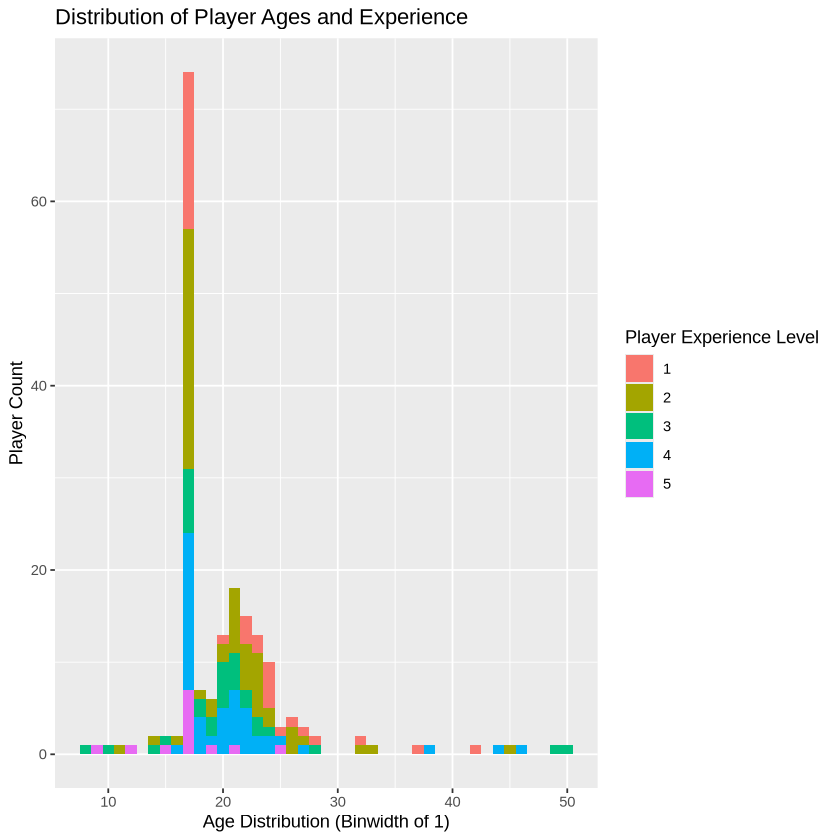

In [89]:
# Histogram for player age and experience distribution
age_experience_dist <- tidy_players |>
    ggplot(aes(x = Age, fill = factor(experience_numeric))) +
    geom_histogram(binwidth=1) +
    xlab("Age Distribution (Binwidth of 1)") +
    ylab("Player Count") +
    labs(fill = "Player Experience Level") +
    ggtitle("Distribution of Player Ages and Experience")

age_experience_dist

### Figure 1 ^^^
Distribution of player ages and experience level

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


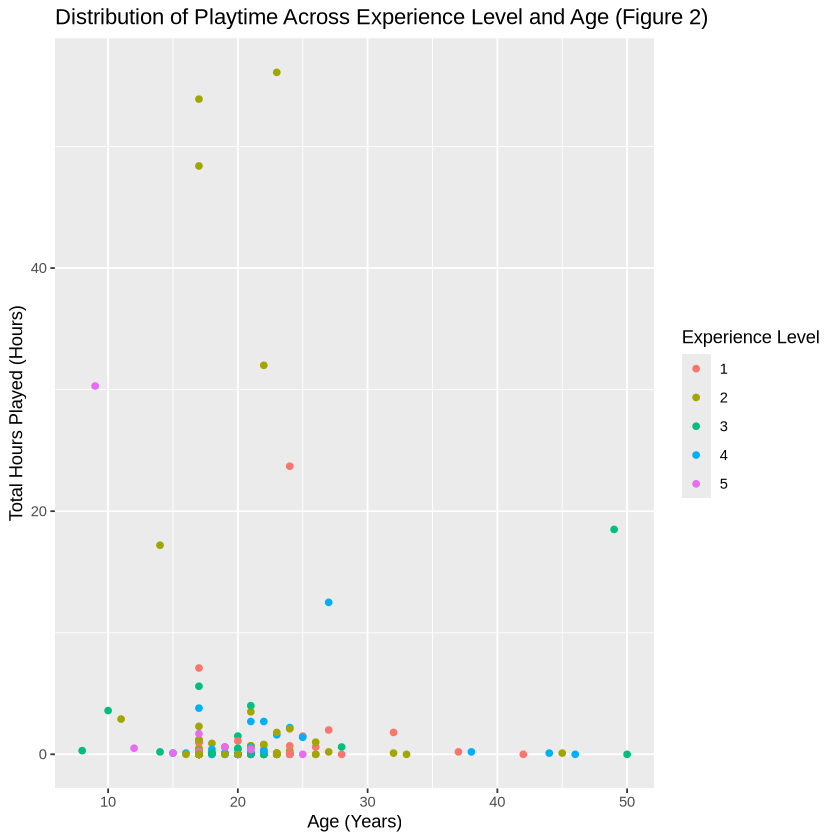

In [90]:
# Age vs Play time
prepredict_plot <- tidy_players |>
    ggplot(aes(x=Age, y=played_hours, color = as.factor(experience_numeric))) +
    geom_point() +
    labs(x = "Age (Years)",
         y = "Total Hours Played (Hours)",
         color = "Experience Level") +
    ggtitle("Distribution of Playtime Across Experience Level and Age (Figure 2)")
prepredict_plot

### Figure 2 ^^^
A scatter plot of our tidy data, Total Hours vs Age, and Experience Level as the color before our predictions

#### Modelling
Due to the absence of a clear linear relationship between age and hours played, we applied k-nearest neighbors (kNN) regression to predict **played_hours** based on **Age**. The data was split into training and testing sets (75% and 25%, respectively), and 5-fold cross-validation was used on the training set to tune the number of neighbors.

Using the *tune_grid()* function, we evaluated the root mean squared error (RMSE) across different values of k from 1 to 30. The lowest RMSE was achieved at k = 27, as shown in Figure 3, and this value was selected for the final model.
<br><br>

#### Model Evaluation
The kNN model with *k = 27* was trained on the full training set and evaluated on the test set, yielding an **RMSE of 8.28**, indicating reasonable predictive accuracy.

We then predicted playtime across a grid of ages (from minimum to maximum) for all experience levels. These predictions were visualized alongside the original data in Figure 4, which overlays the predicted regression line over the scatter plot.

To further explore the relationship between age and playtime within each experience level, we trained separate kNN models for each level and plotted the resulting predictions (Figure 5). Each regression line in this figure represents how predicted playtime changes with age for each experience level.

In [91]:
# use knn regression as a linear relationship is not present within the data

players_split <- initial_split(tidy_players, prop = 0.75, strata = played_hours)
players_train <- training(players_split)
players_test <- testing(players_split)

knn_recipe <- recipe(played_hours ~ Age, data = tidy_players) |>
    step_impute_mean(all_numeric_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_vfold <- vfold_cv(players_train, v = 5, strata = played_hours)

players_wf <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) 

players_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_impute_mean()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7.553347,5,1.468755,Preprocessor1_Model01
2,rmse,standard,6.816782,5,1.678794,Preprocessor1_Model02
3,rmse,standard,6.877638,5,1.645671,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,rmse,standard,6.251566,5,1.910477,Preprocessor1_Model28
29,rmse,standard,6.218289,5,1.922783,Preprocessor1_Model29
30,rmse,standard,6.239829,5,1.914034,Preprocessor1_Model30


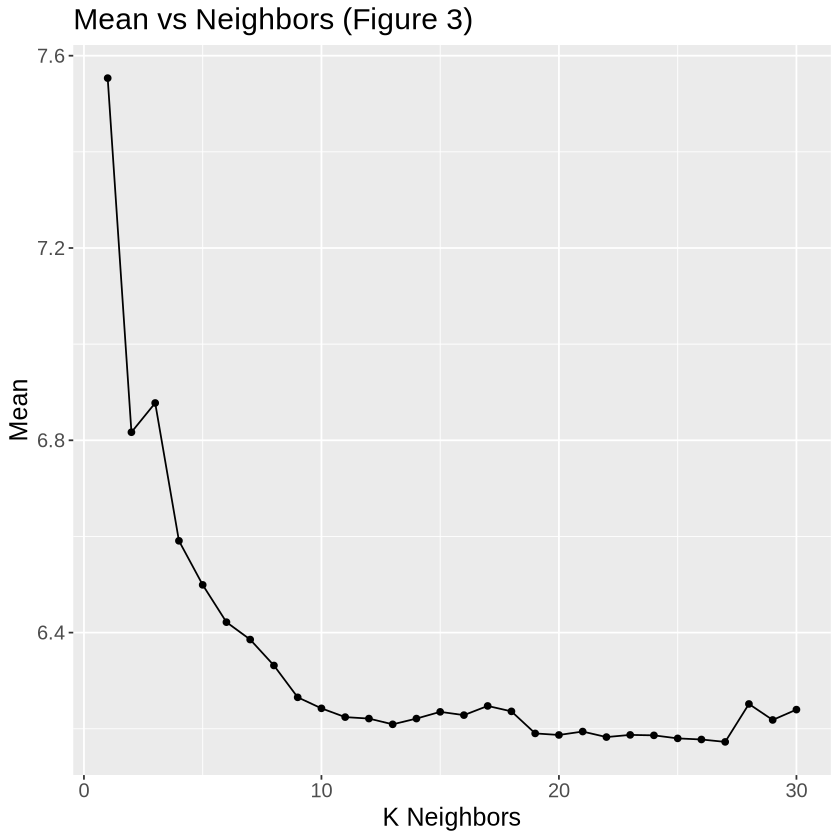

In [92]:
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

players_results <- players_wf |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse")

players_results

rmse_plot <- players_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_line() +
    geom_point() +
    ggtitle("Mean vs Neighbors (Figure 3)") + 
    xlab("K Neighbors") +
    ylab("Mean") +
    theme(text=element_text(size=15))

rmse_plot

### Figure 3 ^^^
Mean vs Neighbors plot to help us find the best number of neighbors to use for our prediction analysis.

In [93]:
min_neighbor <- players_results |>
    filter(mean == min(mean))

min_neighbor

# lowest rmse is when k = 27

k_min <- min_neighbor |>
    pull(neighbors)

k_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
27,rmse,standard,6.172659,5,1.961788,Preprocessor1_Model27


[1] 27

In [94]:
players_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_final_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(players_final_spec) |>
    fit(data = players_train)

players_summary <- players_final_fit |>
    predict(players_test) |>
    bind_cols(players_test) |>
    metrics(truth = played_hours, estimate = .pred) |>
    filter(.metric == "rmse")

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9.182707


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


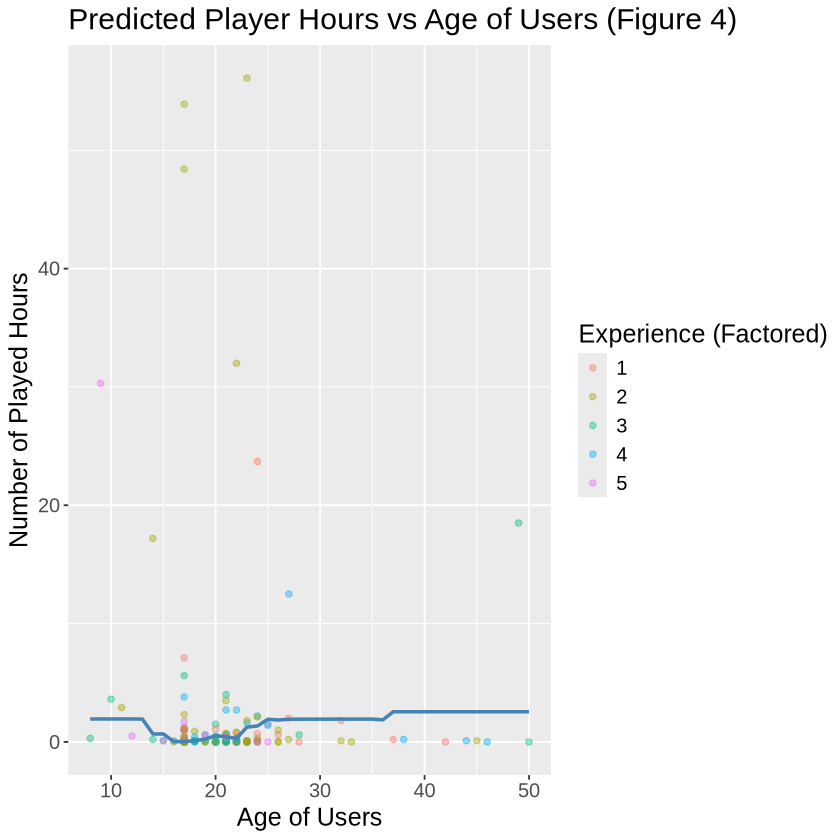

In [95]:
players_prediction_grid <- expand_grid(
  Age = seq(
    from = min(tidy_players$Age, na.rm = TRUE),
    to   = max(tidy_players$Age, na.rm = TRUE),
    by = 1
  ),
  experience_numeric = 1:5 
)

players_pred <- players_final_fit |>
    predict(players_prediction_grid)|>
    bind_cols(players_prediction_grid)

players_plot_final <- tidy_players |>
    ggplot(aes(x = Age, y = played_hours, color = as.factor(experience_numeric))) +
    geom_point(alpha = 0.4) +
    geom_line(data = players_pred, mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
    xlab("Age of Users") +
    ylab("Number of Played Hours") +
    ggtitle("Predicted Player Hours vs Age of Users (Figure 4)") +
    labs(color = "Experience (Factored)") +
    theme(text=element_text(size=15))

players_plot_final

### Figure 4 ^^^
Scatter plot of our data with our predicted k nearest neighbors regression line

Warning message:
“5 samples were requested but there were 9 rows in the data. 4 will be used.”


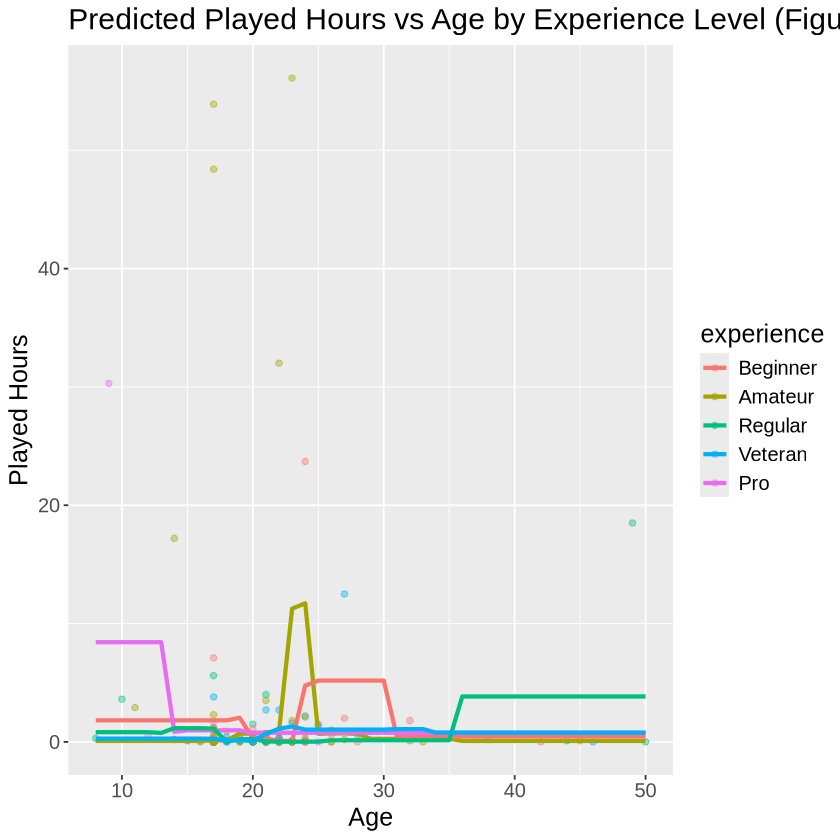

In [96]:
tidy_players <- players |>
  mutate(
    experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))
  ) |>
  select(played_hours, experience, Age) |>
  filter(played_hours < 60, !is.na(Age))


age_grid <- tibble(Age = seq(min(tidy_players$Age), max(tidy_players$Age), by = 1))


predict_per_experience <- function(experience_level) {
  
  data_exp <- tidy_players |> filter(experience == experience_level)
  
  set.seed(123)
  data_split <- initial_split(data_exp, prop = 0.75)
  data_train <- training(data_split)
  
  
  rec <- recipe(played_hours ~ Age, data = data_train) |>
    step_impute_mean(all_predictors()) |>
    step_normalize(all_predictors())
  
  spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>  # Adjust k as needed
    set_engine("kknn") |>
    set_mode("regression")
  
  wf <- workflow() |>
    add_recipe(rec) |>
    add_model(spec)
  
  
  fit <- wf |> fit(data = data_train)
  
  
  preds <- fit |> predict(age_grid) |>
    bind_cols(age_grid) |>
    mutate(experience = experience_level)
  
  return(preds)
}


experience_levels <- levels(tidy_players$experience)


all_preds <- map_dfr(experience_levels, predict_per_experience)


tidy_players |> 
  ggplot(aes(x = Age, y = played_hours, color = experience)) +
  geom_point(alpha = 0.4) +
  geom_line(data = all_preds, aes(x = Age, y = .pred, color = experience), size = 1.2) +
  labs(title = "Predicted Played Hours vs Age by Experience Level (Figure 5)",
       x = "Age", y = "Played Hours") +
    theme(text=element_text(size=15))

### Figure 5 ^^^
Scatter plot with 5 different k nearest neighbor regression lines, one for each experience level

## Discussion

### Our results
Based purely on the results after performing separate knn-regression analysis on each individual experience group (beginners, amateurs, etc.), we predict that “Amateurs” of around 22-25 years old would contribute the most hours on a Minecraft server, and thus provide the most data to the video game research. We would also predict “Pros” below the age of 15, “Regulars” above the age of 35, and “Beginners” between the ages 23-31 to have relatively higher playtimes on the Minecraft server. 
	However, given that the dataset provided contains a large amount of outliers with very uneven age distributions, we can not be confident that the model will accurately predict a player’s playtime just with their age and experience level. Because of the outliers, the trend in predicted playtime is volatile and heavily dependent on the concentration of participants in certain age ranges. For example, the reason why the model predicts “Regulars” above the age of 35 to contribute more play time is due to an age 50 outlier with a playtime of around 19 hours. Since there are barely any participants above the age of 30 to outnumber the outlier, the outlier ends up heavily skewing the prediction to increase the predicted playtime amongst older “Regulars”. 
Furthermore, our final model had an RMSE of 8.28, indicating that there was a large difference between the predicted and actual values. Considering the average playtime of users was 5.85 hours, the average prediction error in our case was larger than the average value that our model was trying to predict, making it a poor predictor overall. 

### Expected findings vs results
Intuitively speaking, we would expect younger participants with greater Minecraft experience to spend more time on the Minecraft server. This is because video games tend to appeal to the younger population, and those with greater experience are typically people who enjoy the game and have already dedicated relatively large amounts of time playing. However, not only does there seem to be no correlation between level of experience and playtime, but the knn-regression trained on the merged experience dataset predicted that the playtime should increase with age, going against our expectations.
### Significance
The findings of this study suggest that relying solely on age and self-reported experience levels to predict player engagement is insufficient for participant recruitment. Since these variables did not show consistent correlations with total playtime, recruitment efforts based on such criteria may lead to missed opportunities to engage more active users. The high RMSE observed in our model suggests that the predictions are not reliable enough on their own. Future research efforts would benefit from collecting larger, more representative datasets to reduce the influence of outliers. 

### What future questions could this lead to?
From this analysis, it is clear that age and experience are poor predictors of playtime on a Minecraft server. A point of interest for future studies may then be to explore how other variables relate to playtime. For example, unlike experience and age, a player’s gender may significantly influence a player’s playtime on the Minecraft server.
Secondly, clustering in analysis could produce groupings of the players besides the ones available in the dataset. These groupings would be more organic than the ones in the dataset obtained by the survey, potentially serving as better predictors for the types of people who would contribute more data to the research. For this reason, it would be worthwhile to explore the question of whether we can obtain new groupings of the dataset by clustering.
